In [29]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [30]:
# point to license plate image (works well with custom crop function)
gray = cv2.imread("cr_img.jpg", 0)
cv2.imshow("input", gray)
cv2.waitKey(0)
gray = cv2.resize(gray, None, fx = 1, fy = 1, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
cv2.imshow("Threshold", thresh)
cv2.waitKey(0)

-1

In [31]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# apply dilation 
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
cv2.imshow("dilation", dilation)
cv2.waitKey(0)
# find contours

-1

In [32]:
# find contours
try:
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
except:
    ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

#drawing these contours
blank = np.zeros((1500, 1500, 3), dtype='uint8')
cv2.drawContours(blank, contours ,-1, (0,255,0), 1)
cv2.imshow("contours drawn", blank)
cv2.waitKey(0)
cv2.destroyAllWindows()

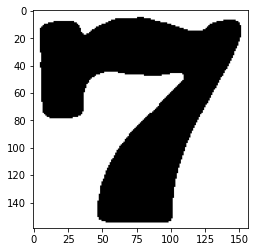

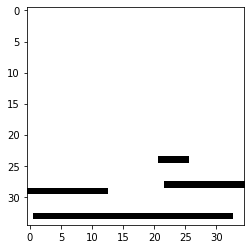

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


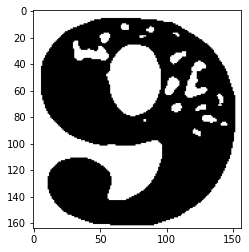

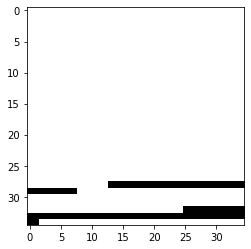

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


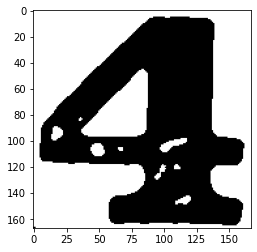

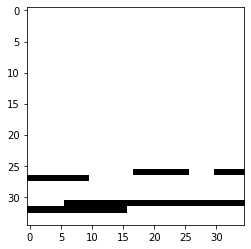

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


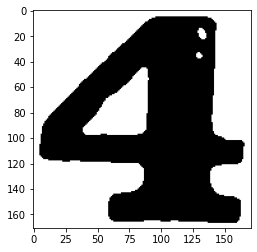

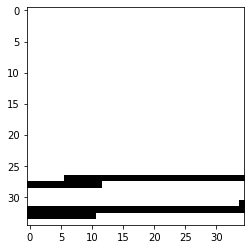

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


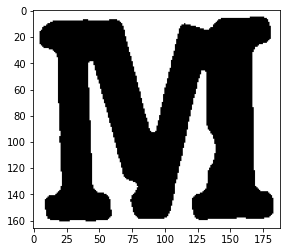

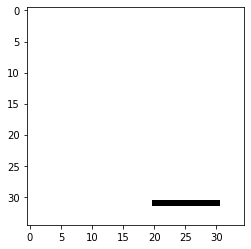

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


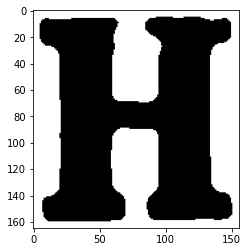

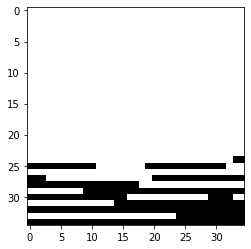

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


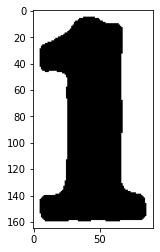

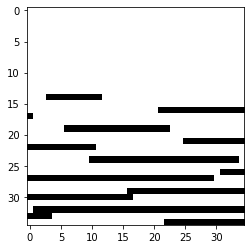

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


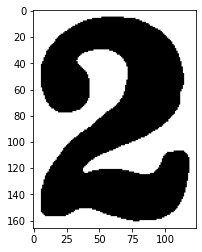

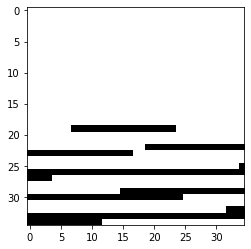

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


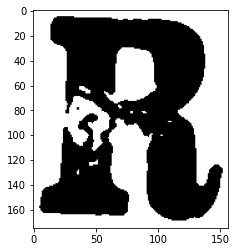

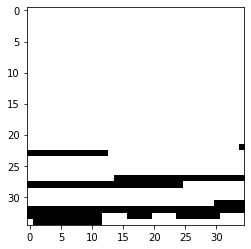

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


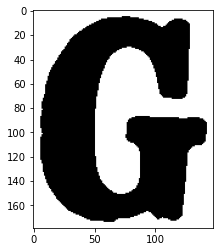

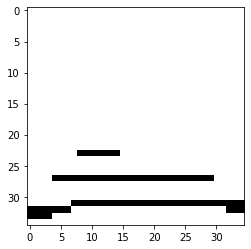

Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
(35, 35)


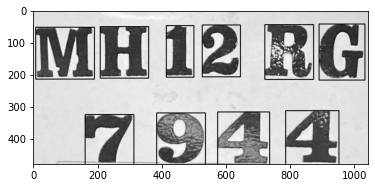

(35, 35)

In [46]:
# create copy of image
from numpy import asarray
import sys
from skimage.exposure import histogram
im2 = gray.copy()

plate_num = ""
ROI_number = 0
# loop through contours and find letters in license plate
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    height, width = im2.shape
    
    # if height of box is not a quarter of total height then skip
    #if height / float(h) > 12: continue
    if height / float(h) > 122: continue
    ratio = h / float(w)
    # if height to width ratio is less than 1.5 skip
    if ratio < 0.5: continue
    area = h * w
    # if width is not more than 25 pixels skip
    #if width / float(w) > 15: continue
    if width / float(w) > 125: continue
    # if area is less than 100 pixels skip
    if area < 800: continue
    # draw the rectangle
   # im2 = im2.resize((35,35))
    rect = cv2.rectangle(im2, (x,y), (x+w+5, y+h+5), (0,255,0),2)
    roi = thresh[y-5:y+h+5, x-5:x+w+5]
    #roi = thresh[y:y, x:x]
    roi = cv2.bitwise_not(roi)
    roi = cv2.medianBlur(roi,7)
    rows , cols = roi.shape
    roi = roi[0:rows , 0:cols]
    #roi = roi.resize((35,35))  
    plt.imshow(roi, cmap='gray')
    plt.show()
   
    ROI_number = ROI_number + 1
    
    #cv2.imshow("ROI", roi)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    #print(fea)
    
    '' 'normalization'''
    min = sys.maxsize
    max = -sys.maxsize
    image = roi.copy()
    image.resize((35,35))
    plt.imshow(image, cmap='gray')
    plt.show()
    np_image = asarray(image)
    if min > np_image.min():
        min = np_image.min()
    if max < np_image.max():
        max = np_image.max()    
        
    np_image = np_image.astype('float32')
    #print("BEGINNING PIXEL VALUES", np_image)
    print('Data Type: %s' % np_image.dtype)
    print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
    np_image -= min
    np_image /= (max - min)
    print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
    #np.set_printoptions(threshold=np.inf)
    #print(np_image)
    print(np_image.shape)
    
    '''normalization end'''
    #cv2.imwrite('tr_20X20/ROI_{}.png'.format(ROI_number),roi)
   # ROI_number = ROI_number + 1
#print("features")
 
#cv2.imshow("Character's Segmented", im2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(im2, cmap='gray')
plt.show()
np_image.shape

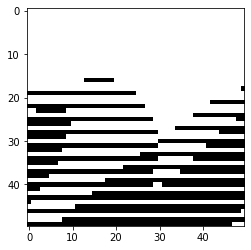

In [44]:
image = roi.copy()
image.resize((50,50))
plt.imshow(image, cmap='gray')
plt.show()

In [58]:
np.set_printoptions(threshold=np.inf)


In [ ]:
#sending images to particular folder

In [7]:
#feature extraction
from skimage import filters
from skimage.exposure import histogram
import cv2

# prewitt kernel
h_edge = filters.prewitt_h(roi, mask=None)
v_edge = filters.prewitt_v(roi, mask=None)

# Sobel Kernel
ed_sobel = filters.sobel(roi)

#canny algorithm
#can = feature.Canny(pixels)


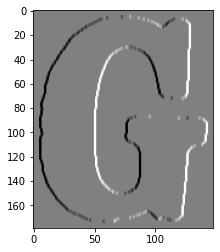

In [8]:
plt.imshow(v_edge, cmap='gray')

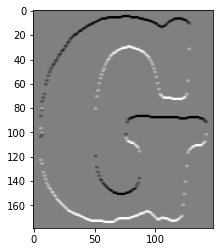

In [9]:
plt.imshow(h_edge, cmap='gray')

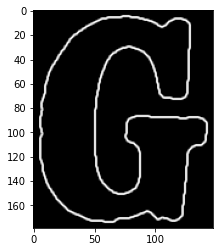

In [10]:
plt.imshow(ed_sobel, cmap='gray')

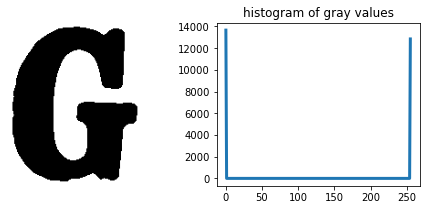

In [11]:
from skimage.exposure import histogram
nm =0

hist, hist_centers = histogram(roi)

    #Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(roi, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=3)
axes[1].set_title('histogram of gray values')
nm =  nm +1

In [12]:
from skimage.exposure import histogram
hist, hist_centers = histogram(pixels)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(pixels, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

NameError: name 'pixels' is not defined

In [ ]:
#model training

In [22]:
import sys 
min = sys.maxsize
max = -sys.maxsize


image = roi.copy()
new_image = image.resize((224,224))    
np_image = asarray(image)
if min > np_image.min():
    min = np_image.min()
if max < np_image.max():
    max = np_image.max()    

np_image = np_image.astype('float32')
print("BEGINNING PIXEL VALUES", np_image)
print('Data Type: %s' % np_image.dtype)
print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
np_image -= min
np_image /= (max - min)

print('Min: %.3f, Max: %.3f' % (np_image.min(), np_image.max()))
print(np_image)
np_image.shape

BEGINNING PIXEL VALUES [[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
Data Type: float32
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(224, 224)

In [ ]:
fea = skimage.feature.hog(image,orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, multichannel=None)
    plt.axis("off")
    plt.imshow(fea, cmap="gray")